In [213]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [214]:

import pandas as pd


In [215]:
#step to data ingection
df =pd.read_csv('https://raw.githubusercontent.com/krishnaik06/FSDSRegression/refs/heads/main/notebooks/data/gemstone.csv')

In [216]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing data in our data sheet

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


cut,colour,clarity  are the classification of the data this cartgorical data this is converted in to int data == data encoding, onehot encoding

In [218]:
#droping not imp colums
df =df.drop(labels=['id'],axis=1)

In [219]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [220]:
#checking for duplicated recordes
df.duplicated().sum()

np.int64(0)

In [221]:
#segrigating the numerical colums and cetegoical colums
numrical_colums = df.columns[df.dtypes!='object']
#segrigating the numerical colums and cetegoical colums
cate_colums = df.columns[df.dtypes=='object']

In [222]:
numrical_colums

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [223]:
cate_colums

Index(['cut', 'color', 'clarity'], dtype='object')

In [224]:
df[cate_colums].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [225]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [226]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [227]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [228]:
numrical_colums

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

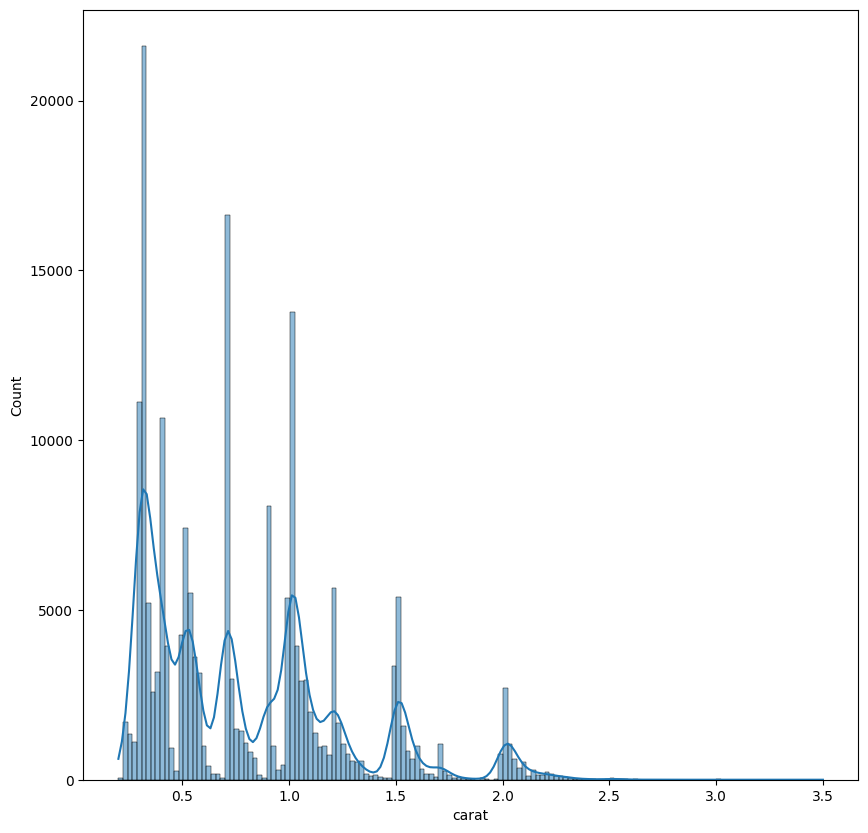

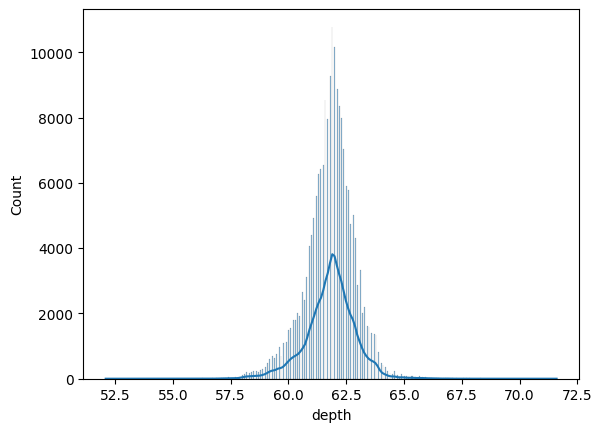

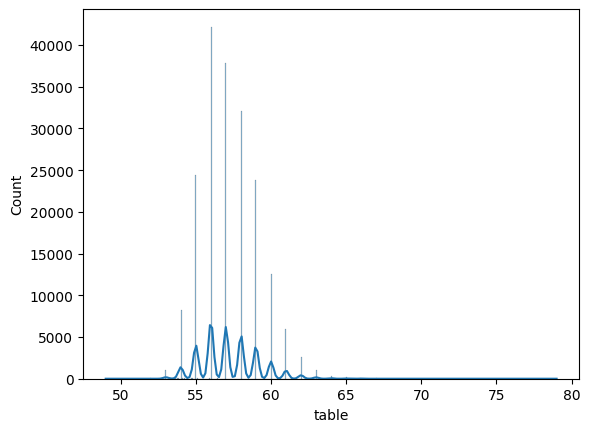

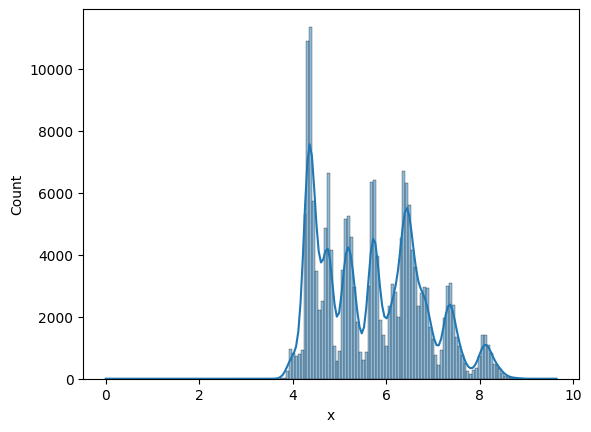

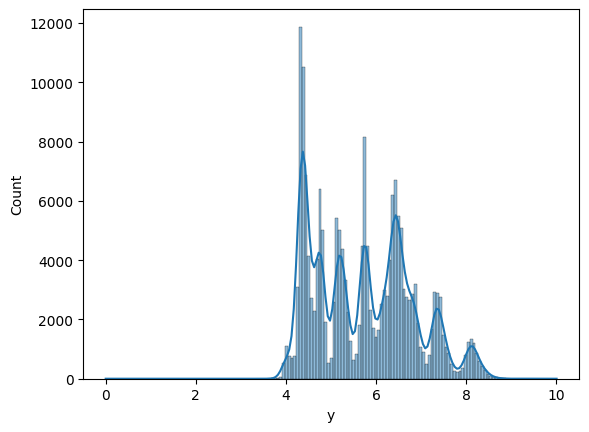

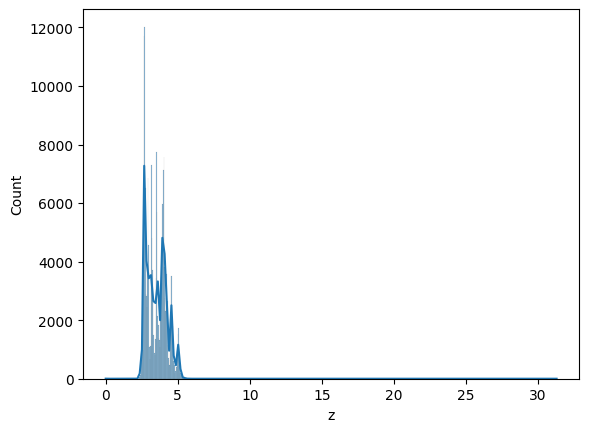

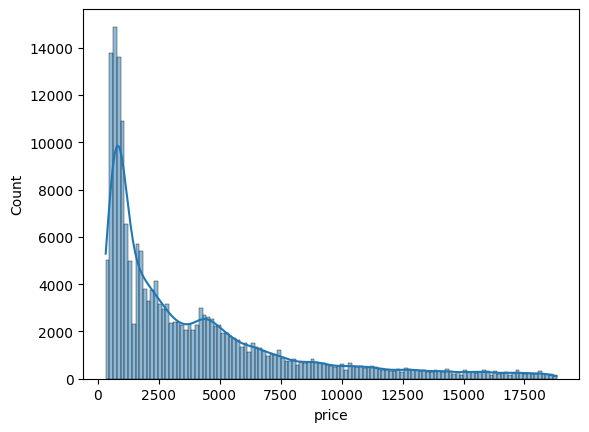

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=1
for i in numrical_colums:
    sns.histplot(data=df, x=i, kde = True)
    print('\n')
    plt.show()


In [230]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [231]:
#

In [232]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [233]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [234]:
cut_map = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}

In [235]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [236]:
clarity_map = {"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}


In [237]:
color_map = {"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [238]:
df['cut']

0           Premium
1         Very Good
2             Ideal
3             Ideal
4           Premium
            ...    
193568        Ideal
193569      Premium
193570    Very Good
193571    Very Good
193572         Good
Name: cut, Length: 193573, dtype: object


df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].replace(color_map)
this is the middle line

In [239]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [240]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [241]:
x = df.drop(labels=['price'],axis=1)
y = df[['price']]

In [242]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [243]:
y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [244]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [245]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [246]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [247]:
categorical_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [248]:
numerical_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [249]:
#defineing the custum ranking for each orginal variable
cut_categories = ['Fair','Good','Very Good', 'Premium','Ideal']
color_categories = ['D','E','F','G','H','I','J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [250]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [251]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\ranje\onedrive\desktop\hosuseprice\env\lib\site-packages (1.6.0)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [252]:
from sklearn.impute import SimpleImputer #handling the missing values

In [253]:
from sklearn.preprocessing import StandardScaler #reducing the size or the data of the scaling 

In [254]:
from sklearn.preprocessing import OrdinalEncoder #responsible for the ordinal encoding  where categorical feature having ranks

In [255]:
#pipeline --> combinging the multiple steps just connecting
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [285]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [286]:
#Train test spilt 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [287]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
11504,0.41,Ideal,E,VVS2,60.6,56.0,4.85,4.80,2.93
95284,1.23,Very Good,H,VS1,59.9,59.0,6.91,7.01,4.19
184777,1.70,Premium,H,VS2,62.0,58.0,7.61,7.66,4.74
5419,0.33,Ideal,F,VVS1,61.2,56.0,4.47,4.44,2.73
45466,0.33,Very Good,I,SI1,62.1,58.0,4.41,4.45,2.75
...,...,...,...,...,...,...,...,...,...
119879,0.50,Very Good,E,SI1,60.2,61.0,5.11,5.15,3.09
103694,1.91,Very Good,F,SI1,62.3,62.0,7.85,7.79,4.87
131932,1.22,Premium,G,VS2,62.8,58.0,6.82,6.74,4.26
146867,0.31,Very Good,G,VVS1,61.1,56.0,4.37,4.40,2.67


In [260]:
y_train

,price
11504,1181
95284,7418
184777,12755
5419,1020
45466,445
...,...
119879,1410
103694,15064
131932,7209
146867,816


In [267]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
11504,0.41,Ideal,E,VVS2,60.6,56.0,4.85,4.80,2.93
95284,1.23,Very Good,H,VS1,59.9,59.0,6.91,7.01,4.19
184777,1.70,Premium,H,VS2,62.0,58.0,7.61,7.66,4.74
5419,0.33,Ideal,F,VVS1,61.2,56.0,4.47,4.44,2.73
45466,0.33,Very Good,I,SI1,62.1,58.0,4.41,4.45,2.75
...,...,...,...,...,...,...,...,...,...
119879,0.50,Very Good,E,SI1,60.2,61.0,5.11,5.15,3.09
103694,1.91,Very Good,F,SI1,62.3,62.0,7.85,7.79,4.87
131932,1.22,Premium,G,VS2,62.8,58.0,6.82,6.74,4.26
146867,0.31,Very Good,G,VVS1,61.1,56.0,4.37,4.40,2.67


In [281]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
14868,0.50,Ideal,D,SI1,62.1,57.0,5.05,5.08,3.14
165613,2.00,Very Good,G,SI2,59.5,57.0,8.08,8.15,4.89
96727,0.27,Premium,E,VVS1,60.5,59.0,4.19,4.16,2.52
145593,0.32,Premium,I,VVS1,61.2,59.0,4.43,4.44,2.71
118689,1.19,Ideal,H,SI1,62.5,56.0,6.77,6.81,4.23
...,...,...,...,...,...,...,...,...,...
39151,0.91,Very Good,I,SI2,62.4,59.0,6.18,6.13,3.83
32423,0.51,Ideal,D,VS2,62.4,56.0,5.13,5.11,3.19
17876,0.41,Ideal,G,VVS1,61.8,56.0,4.79,4.77,2.95
72938,1.21,Premium,I,SI1,61.1,60.0,6.88,6.79,4.18


In [288]:
x_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())


In [289]:
x_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [290]:
#modeltraning
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet,Ridge

In [282]:
print(df.columns)


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')


In [277]:
x_train 


,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,0.874100,-0.936747,1.350746
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,-1.137644,0.910853,0.684455
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,-0.131772,0.910853,0.018164
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,0.874100,-0.320880,2.017037
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,-1.137644,1.526720,-0.648127
...,...,...,...,...,...,...,...,...,...
135496,-0.629077,-1.500179,1.964434,-0.546492,-0.518125,-0.644575,-1.137644,-0.936747,-0.648127
135497,2.411307,0.443325,2.485700,1.919078,1.872797,1.930288,-1.137644,-0.320880,-0.648127
135498,0.923460,0.906065,0.400636,0.992240,0.921862,1.047891,-0.131772,0.294987,0.018164
135499,-1.038774,-0.667249,-0.641897,-1.212375,-1.197364,-1.252127,-1.137644,0.294987,2.017037


In [291]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [292]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [293]:
reg.coef_

array([[ 6432.97591819,  -132.34206204,   -70.48787525, -1701.38593925,
         -494.17005097,   -76.32351645,    68.80035873,  -464.67990411,
          652.10059539]])

In [294]:
reg.intercept_

array([3976.8787389])

In [295]:
import numpy as np 
def evalute_model(true,predicated):
    mae = mean_absolute_error(true,predicated)
    mse = mean_squared_error(true,predicated)
    rmse=np.sqrt(mean_squared_error(true,predicated))
    r2_square = r2_score(true,predicated)
    return mae,mse,rmse,r2_square


In [311]:
#training the multiple model
models = {
   'LinearRegression':LinearRegression(),
   'Lasso':Lasso(),
   'Ridge':Ridge(),
   'ElasticNet':ElasticNet()

}
model_list = []
r2_list= [] #for every model r2 value i get

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mae,mse,rmse,r2_square= evalute_model(y_pred,y_test)
    print(list(models.values())[i])
    model_list.append(list(models))
    print("model training performance")
    print("mae",mae)
    print("mse",mse)
    print("rmse",rmse)
    print("r2_square",r2_square)
    print("="*35)   
    print("\n")


LinearRegression()
model training performance
mae 675.0758270067483
mse 1029473.3531156846
rmse 1014.6296630375463
r2_square 0.9314497641619309


Lasso()
model training performance
mae 676.2421173665508
mse 1029533.1506505491
rmse 1014.659130275064
r2_square 0.9313706388806771


Ridge()
model training performance
mae 675.1077629781329
mse 1029482.8101268952
rmse 1014.6343233534411
r2_square 0.9314462925139522


ElasticNet()
model training performance
mae 1060.9432977143008
mse 2351174.8713978743
rmse 1533.3541245902313
r2_square 0.778554360252738


